コードが動かない場合にはAPIやライブラリ等がアップデートしている可能性があります。その際には以下のGitHubページにて更新情報がないかご確認ください。

https://github.com/tamanome/satelliteBook


# 衛星画像データを取得する

この章では、衛星データの取得方法例を紹介します。衛星データは様々なところに散らばっており、そのようなデータを集めたものとして、Spatio Temporal Asset Catalog (STAC)が有名です。今回はSentinel-2を例として、オリジナルのデータ提供元からデータを取得する場合、STACから取得する場合の二つを挙げます。

始めに、サイトからの直接ダウンロードとsentinelsatのAPIを用いた衛星データの取得方法について触れ、最後に、STACからデータを入手する方法について説明します。

## Copernicus Data Space Ecosystem (CDSE)を利用する

2023年10月に[Copernicus Open Access Hub](https://scihub.copernicus.eu/)は閉鎖されました。

閉鎖に伴い、以前のAPIが利用できなくなった関係で、`sentinelsat`を利用した衛星画像データの取得が不可能となっています。

そのため、Copernicsが提供する新しいプラットフォームである、[Copernicus Data Space Ecosystem (CDSE)](https://dataspace.copernicus.eu/)を利用した衛星画像データの取得方法についてご紹介します。

### ユーザー登録

まずは、旧PFの指示通りに、新しくユーザー登録を行います。

登録の詳細については、[公式のドキュメント](https://documentation.dataspace.copernicus.eu/Registration.html)をご確認ください。

![registration](https://documentation.dataspace.copernicus.eu/_images/registration/Welcome.png)


登録情報の記載が完了すると、登録情報にあるメールアドレス確認のメールが届くので、メールを確認し、"Verify email address"で登録情報の確定を行います。

CDSEでは下記の衛星画像データをダウンロードすることが可能です。
※2024年4月現在

Copernicus Sentinel Mission:
- SENTINEL-1
- SENTINEL-2
- SENTINEL-3
- SENTINEL-5P
- SENTINEL-6
- SENTINEL-1-RTC (Sentinel-1 Radiometric Terrain Corrected)

Complementary data:
- GLOBAL-MOSAICS (Sentinel-1 and Sentinel-2 Global Mosaics)
- SMOS (Soil Moisture and Ocean Salinity)
- ENVISAT (ENVISAT- Medium Resolution Imaging Spectrometer - MERIS)
- LANDSAT-5
- LANDSAT-7
- LANDSAT-8
- COP-DEM (Copernicus DEM)
- TERRAAQUA (Terra MODIS and Aqua MODIS)
- S2GLC (S2GLC 2017)

### データアクセス

CDSEでは、データカタログの閲覧、衛星データプロダクトのダウンロード、SentinelHubなどのサービスを利用したデータの可視化などをAPIを介して提供をしています。

データダウンロードのAPIs

- https://documentation.dataspace.copernicus.eu/APIs/OData.html
- https://documentation.dataspace.copernicus.eu/APIs/STAC.html
- https://documentation.dataspace.copernicus.eu/APIs/OpenSearch.html
- https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Catalog.html

本記事では、openEOを利用したデータアクセス方法について記載します。

In [1]:
# 必要なパッケージのインストール
!pip install openeo
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 5.0 MB/s eta 0:00:00


CDESが提供しているバックエンドを利用します。そのためには、`openeo.connect`でバックエンド側との接続を確立する必要があります。

In [3]:
import openeo
import xarray
import matplotlib.pyplot as plt

# CDESのバックエンドと接続
connection = openeo.connect("openeo.dataspace.copernicus.eu")

# 接続の確認のため、SENTINEL2_L2のメタデータ詳細を取得し出力する
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/Sentinel2.html',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2_L2A_CDAS&fromTime=2023-02-07T00%3A00%3A00.000Z&toTime=

CDSE openEOのバックエンドへ接続が完了していれば、Sentinel-2のLevel2処理のデータプロダクトに対する詳細説明を確認することができたはずです。

概要にはデータが観測している領域や、どのようなデータがあるのかなどが示されます。

続いて、実際にデータを利用するため、認証を行います。CDSEへの登録が完了していれば、認証を通すことが可能です。

`conection.authenticate_oidc()`を実行し、出力されたURLへと遷移します。
遷移先で、認証を許可するかの確認がありますので、Yesを選択してください。


In [4]:
connection.authenticate_oidc()

## ※バックエンドへの接続から認証までのプロセスは下記のようにまとめることができます
# connection = openeo.connect(
#     "openeo.dataspace.copernicus.eu"
# ).authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=FHTT-AETV 📋 to authenticate.

[################################-----] ✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

![authentication](https://drive.google.com/uc?id=1KVy7DGfTlyESG1I9XBgd3BhRX0noDpyW)

上記画像のYesを押下してください。

`load_collection`のメソッドを用いて、`DataCube`を構築するために、データコレクションを読み込みます。

このメソッドでは、単にデータのダウンロードだけでなく、データ期間やどのバンドが欲しいのかなどを設定することが可能です。

In [8]:
# 中琉球のあたりを検索対象に設定
datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": 129.35, "south": 28.35, "east": 129.45, "north": 28.43, "crs": "EPSG:4326"},
    temporal_extent = ["2024-03-01", "2024-03-31"],
    bands=["B04", "B03", "B02", "SCL"],
    max_cloud_cover=85,
)

`DataCube`のオブジェクトをNetwork Common Data Form (NetCDF)形式でダウンロードします。

xarrayのデータ構造は、netCDF形式で保存することを公式が推奨しています。ここではそれに倣い`.nc`として保存しましょう。

In [10]:
# データのダウンロード（数分ほどかかります）
datacube.download("s2-amami.nc")

※データ取得領域の限定方法としては、aoi (area of interest)を定める方法もあります。下記セルを参照してください。

In [11]:
# # 必要に応じてコメントアウトを解除してください
# # 興味領域を指定（今回は徳之島周辺）
# aoi = {
#   "type": "FeatureCollection",
#   "features": [
#     {
#       "type": "Feature",
#       "properties": {},
#       "geometry": {
#         "coordinates": [
#           [
#             [
#               128.88797707818514,
#               27.811107250310513
#             ],
#             [
#               128.88797707818514,
#               27.707978335954337
#             ],
#             [
#               129.04318576313972,
#               27.707978335954337
#             ],
#             [
#               129.04318576313972,
#               27.811107250310513
#             ],
#             [
#               128.88797707818514,
#               27.811107250310513
#             ]
#           ]
#         ],
#         "type": "Polygon"
#       }
#     }
#   ]
# }

# # datacubeオブジェクトの構築
# datacube = connection.load_collection(
#     "SENTINEL2_L2A",
#     temporal_extent = ["2024-03-31", "2024-03-31"],
#     bands=["B04", "B03", "B02", "SCL"],
#     max_cloud_cover=85,
# ).filter_spatial(aoi)

# # データのダウンロード（1分程度かかります）
# datacube.download("s2-tokunoshima.nc")

In [12]:
# 保存したncデータをxarrayとして読み込む
ds = xarray.open_dataset("s2-amami.nc")
ds

<xarray.Dataset>
Dimensions:  (t: 3, x: 984, y: 890)
Coordinates:
  * t        (t) datetime64[ns] 2024-03-11 2024-03-16 2024-03-21
  * x        (x) float64 5.343e+05 5.343e+05 5.343e+05 ... 5.441e+05 5.441e+05
  * y        (y) float64 3.145e+06 3.145e+06 3.145e+06 ... 3.136e+06 3.136e+06
Data variables:
    crs      |S1 ...
    B04      (t, y, x) float32 ...
    B03      (t, y, x) float32 ...
    B02      (t, y, x) float32 ...
    SCL      (t, y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

このxarrayは三つの次元（Dimensions）で構成されています。

※次元はnumpyで言うところのaxisに相当します。

また三つの座標（Coordinates）で構成され、これはPandasのDataFrameやSeriesと似たものと考えてください。
- t: time (datetime64[ns])
- x: latitude (float64)
- y: longitude (float64)

このデータは、以下の変数も格納しています。
- crs
- B04
- B03
- B02
- SCL

crs以外の配列データは全て（t, y, x）を持つ三次元配列として定義されています。

座標を利用すれば、任意の範囲でデータを取得することも可能です。

In [13]:
# t (time)のみを指定する
ds['t']

<xarray.DataArray 't' (t: 3)>
array(['2024-03-11T00:00:00.000000000', '2024-03-16T00:00:00.000000000',
       '2024-03-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2024-03-11 2024-03-16 2024-03-21
Attributes:
    standard_name:  t
    long_name:      t
    axis:           T

pandasのようにインデックスを指定することも可能です。

In [15]:
# 2024年1月1日のデータを抽出
ds.sel(t="2024-03-11")

<xarray.Dataset>
Dimensions:  (x: 984, y: 890)
Coordinates:
    t        datetime64[ns] 2024-03-11
  * x        (x) float64 5.343e+05 5.343e+05 5.343e+05 ... 5.441e+05 5.441e+05
  * y        (y) float64 3.145e+06 3.145e+06 3.145e+06 ... 3.136e+06 3.136e+06
Data variables:
    crs      |S1 ...
    B04      (y, x) float32 ...
    B03      (y, x) float32 ...
    B02      (y, x) float32 ...
    SCL      (y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

In [16]:
# B4のバンドデータを含んだDataArrayを抽出
ds[["B04"]]

<xarray.Dataset>
Dimensions:  (t: 3, y: 890, x: 984)
Coordinates:
  * t        (t) datetime64[ns] 2024-03-11 2024-03-16 2024-03-21
  * x        (x) float64 5.343e+05 5.343e+05 5.343e+05 ... 5.441e+05 5.441e+05
  * y        (y) float64 3.145e+06 3.145e+06 3.145e+06 ... 3.136e+06 3.136e+06
Data variables:
    B04      (t, y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

補足ですが、データの簡単な描画も可能です。

※詳細は公式のドキュメントをご確認ください。

https://docs.xarray.dev/en/latest/user-guide/plotting.html

Scene Classification Layer (SCL)を時系列順に描画してみましょう。

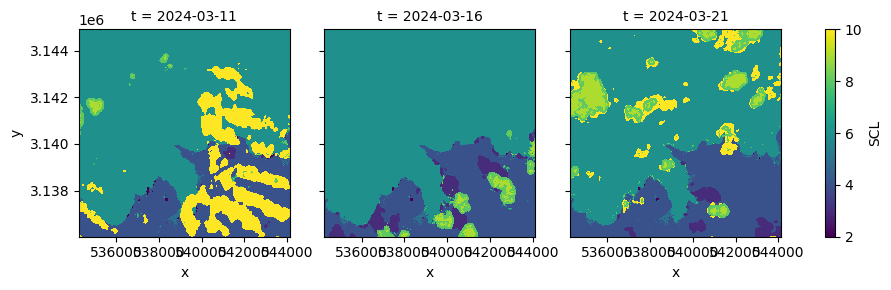

In [17]:
# Scene Classification Layer (SCL)を取得した時系列で描画
ds["SCL"].plot.imshow(col='t')

※参考：Scene Classification Layer (SCL)

3, 8, 9, 19が雲に関連の分類となります。

| Bit value | Classification           |
| --------- | ------------------------ |
| 0         | No data                  |
| 1         | Saturated or defective   |
| 2         | Dark area pixels         |
| 3         | Cloud shadows            |
| 4         | Vegetation               |
| 5         | Bare soils               |
| 6         | Water                    |
| 7         | Unclassified             |
| 8         | Cloud medium probability |
| 9         | Cloud high probability   |
| 10        | Thin cirrus              |
| 11        | Snow or ice              |

データセットから三つの変数（B04、B03、B02）を取得して、データアレイを作成します。新しい次元の名前は"bands"と定義します。



In [18]:
# xarrayデータセットを新しいデータアレイへ変換 (bands, t, x, y)
# 新しい次元名をbandsとする（デフォルト名はvariable）
rgb_data = ds[["B04", "B03", "B02"]].to_array(dim="bands")
rgb_data

# # 2024年2月10日から2024年3月21日までのデータをトゥルーカラー画像で描画
# rgb_data.plot.imshow(vmin=0, vmax=2000, col='t', col_wrap=3, robust=True)

<xarray.DataArray (bands: 3, t: 3, y: 890, x: 984)>
array([[[[ 2.3700e+02,  2.3400e+02,  2.3300e+02, ...,  2.1900e+02,
           2.2600e+02,  2.1900e+02],
         [ 2.4000e+02,  2.2700e+02,  2.3100e+02, ...,  2.4200e+02,
           2.5900e+02,  2.4500e+02],
         [ 2.1700e+02,  2.3800e+02,  2.6700e+02, ...,  2.2600e+02,
           2.5000e+02,  2.3600e+02],
         ...,
         [ 4.5000e+02,  4.8000e+02,  4.8600e+02, ...,  3.1400e+02,
           2.8700e+02,  2.6400e+02],
         [ 4.3700e+02,  4.4200e+02,  4.5900e+02, ...,  3.0600e+02,
           2.6800e+02,  2.3800e+02],
         [ 3.8900e+02,  4.2400e+02,  4.7300e+02, ...,  2.6800e+02,
           2.6000e+02,  2.1900e+02]],

        [[-3.2448e+04, -2.0615e+04, -2.7908e+04, ...,  3.0000e+00,
          -1.1000e+01, -1.1000e+01],
         [ 6.6190e+03, -1.6550e+04,  5.2730e+03, ..., -1.4000e+01,
          -1.0000e+00,  1.0000e+01],
         [ 3.0158e+04,  3.2740e+03, -2.2039e+04, ...,  8.0000e+00,
           1.1000e+01,         nan],
...
         [ 3.6200e+02,  2.6600e+02,  2.3500e+02, ...,  2.1000e+02,
           1.9900e+02,  1.7400e+02],
         [ 3.1200e+02,  2.4000e+02,  2.0000e+02, ...,  1.7800e+02,
           1.5100e+02,  1.5100e+02],
         [ 3.1100e+02,  2.7400e+02,  2.6600e+02, ...,  1.4700e+02,
           1.3300e+02,  1.5500e+02]],

        [[ 3.6000e+02,  3.3300e+02,  3.8000e+02, ...,  3.3500e+02,
           3.5000e+02,  3.2600e+02],
         [ 3.2900e+02,  3.9400e+02,  4.6400e+02, ...,  3.2800e+02,
           3.2600e+02,  3.2100e+02],
         [ 3.4500e+02,  4.6800e+02,  4.3700e+02, ...,  3.5400e+02,
           3.3400e+02,  3.1900e+02],
         ...,
         [ 3.7800e+02,  3.3000e+02,  2.9200e+02, ...,  1.4100e+02,
           1.4900e+02,  1.3900e+02],
         [ 3.4900e+02,  2.9900e+02,  2.6300e+02, ...,  1.3200e+02,
           1.3000e+02,  1.3900e+02],
         [ 2.9500e+02,  3.3600e+02,  3.3300e+02, ...,  1.2300e+02,
           1.5200e+02,  1.2400e+02]]]], dtype=float32)
Coordinates:
  * t        (t) datetime64[ns] 2024-03-11 2024-03-16 2024-03-21
  * x        (x) float64 5.343e+05 5.343e+05 5.343e+05 ... 5.441e+05 5.441e+05
  * y        (y) float64 3.145e+06 3.145e+06 3.145e+06 ... 3.136e+06 3.136e+06
  * bands    (bands) object 'B04' 'B03' 'B02'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

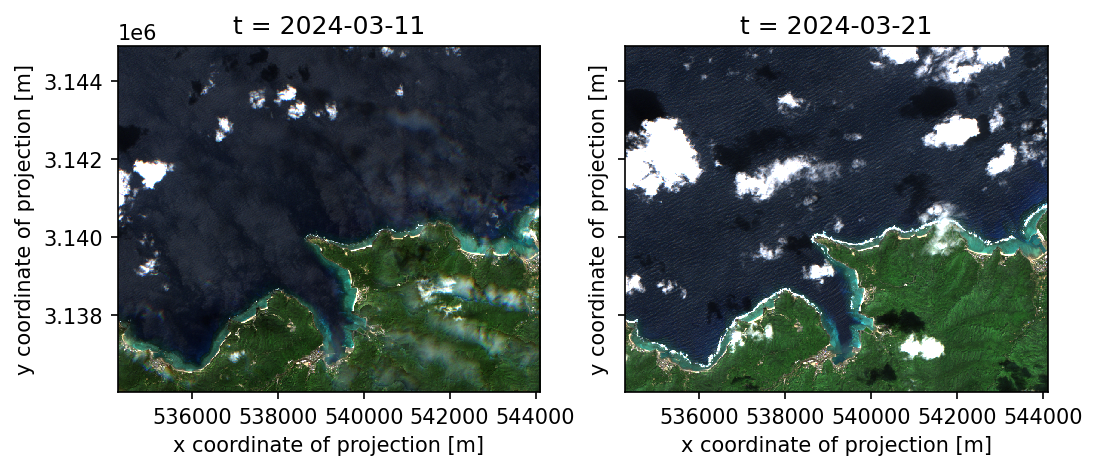

In [19]:
# 最初の日時と最後の日時を指定して描画
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=150, sharey=True)
rgb_data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
rgb_data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1]);

`rioxarray`を利用してtiff画像の出力を行います。

In [27]:
# 2024-3-21のデータをgeotiffとして保存
import rioxarray as rxr

rds = rxr.open_rasterio("s2-amami.nc", decode_times=False, masked=True)
rds["t"] = ds["t"] # 時間データの上書き
rds.isel(t=-1).rio.to_raster("sample_time_slice.tif")

## Spatio temporal Asset Catalog (STAC)を利用する

In [ ]:
# Colab利用時には以下のコマンドを実行してください（初回のみ）
!apt-get install -y libspatialindex-dev

In [ ]:
# STACを利用するために、改めてライブラリのインストールを行います
# Colab利用時にはインストール後ランタイムを再起動してください
# !pip install cartopy
!pip install pygeos
!pip install rtree
!pip install sat-search
!pip install pystac-client

In [ ]:
# ライブラリのインポート
import os, json
os.environ['USE_PYGEOS'] = '0'
from shapely.geometry import MultiPolygon, Polygon, box
from fiona.crs import from_epsg
import numpy as np
from satsearch import Search
from pystac_client import Client
from io import BytesIO
import urllib
from PIL import Image
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import warnings
from skimage import io
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
from osgeo import gdal
warnings.filterwarnings('ignore')

print("done")


done


In [ ]:
AREA =  [
      [
        -220.291841,
        35.6593884
      ],
      [
        -220.2932143,
        35.4817801
      ],
      [
        -220.1380324,
        35.4817801
      ],
      [
        -220.1421523,
        35.6493456
      ],
      [
        -220.291841,
        35.6593884
      ]
    ]

#左回りもしくは右回りに対応
for i in range(len(AREA)):
    if AREA[i][0] >= 0:
        AREA[i][0] = AREA[i][0]%360
    else:
        AREA[i][0] = -(abs(AREA[i][0])%360) + 360

In [ ]:
# AREAから最小緯度・経度、最大緯度・経度を取得します
areaLon = []
areaLat = []
# iterating each number in list
for coordinate in AREA:
  areaLon.append(coordinate[0])
  areaLat.append(coordinate[1])

minLon = np.min(areaLon) # min longitude
maxLon = np.max(areaLon) # max longitude
minLat = np.min(areaLat) # min latitude
maxLat = np.max(areaLat) # max latitude

In [ ]:
# 取得範囲を指定するための関数を定義
def selSquare(minLon, minLat, maxLon, maxLat):
   c1 = [maxLon, maxLat]
   c2 = [maxLon, minLat]
   c3 = [minLon, minLat]
   c4 = [minLon, maxLat]
   geometry = {"type": "Polygon", "coordinates": [[ c1, c2, c3, c4, c1 ]]}
   return geometry

In [ ]:
# # pystac_clientを用いてSTAC APIを利用可能にする
# from pystac_client import Client
# catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1", headers=[])

# # 全てのcollectionを表示
# for collection in catalog.get_collections():
#   print(collection)

# collection = catalog.get_collection('sentinel-2-l2a')
# collection

# # limit sets the # of items per page so we can see multiple pages getting fetched
# #
# search = catalog.search(
#     max_items = 15,
#     limit = 5,
#     collections = "sentinel-2-l2a",
#     intersects = bbox,
#     datetime = "2021-04-10/2021-06-10",
#     query = {"eo:cloud_cover": {"lt": 30}}
# )

# items = list(search.items())
# len(items)

In [ ]:
client = Client.open("https://earth-search.aws.element84.com/v1")
search = client.search(
    max_items=10,
    collections=['sentinel-2-l2a'],
    bbox=[-72.5,40.5,-72,41]
)
print(f"{search.matched()} items found")

4215 items found


In [ ]:
bbox = selSquare(minLon, minLat, maxLon, maxLat) # 画像取得範囲の設定 min lon, min lat, max lon, max lat
dates = '2021-04-10/2021-06-10' # '20210410', '20210610'

from pystac_client import Client
api_url = 'https://earth-search.aws.element84.com/v1'
collection = "sentinel-2-l2a"  # Sentinel-2, Level 2A (BOA)
s2STAC = Client.open(api_url, headers=[])
s2STAC.add_conforms_to("ITEM_SEARCH")

s2Search = s2STAC.search (
   intersects = bbox,
   datetime = dates,
   query = {"eo:cloud_cover": {"lt": 30}},
   collections = collection)

s2_items = [i.to_dict() for i in s2Search.get_items()]
print(f"{len(s2_items)} のシーンを取得")

8 のシーンを取得


In [ ]:
items = s2Search.get_all_items()
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
# 雲量で並び替え
dfSorted = df.sort_values('eo:cloud_cover').reset_index(drop=True)
dfSorted.head()

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:datastrip_id,s2:granule_id,s2:reflectance_conversion_factor,datetime,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated
0,"POLYGON ((138.77761 36.12427, 139.99742 36.140...",2022-11-06T04:40:19.286Z,sentinel-2b,sentinel-2,[msi],9.184856,32654,54,S,UE,...,S2B_OPER_MSI_L2A_DS_EPA__20210423T102458_S2021...,S2B_OPER_MSI_L2A_TL_EPA__20210423T102458_A0215...,0.992162,2021-04-22T01:37:16.557000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/54/S/U...,roda-sentinel2/workflow-sentinel2-to-stac/7a45...,False,{'sentinel2-to-stac': '0.1.0'},2022-11-06T04:40:19.286Z
1,"POLYGON ((138.77761 36.12427, 139.99742 36.140...",2022-11-06T04:41:04.302Z,sentinel-2a,sentinel-2,[msi],9.951990,32654,54,S,UE,...,S2A_OPER_MSI_L2A_DS_VGS4_20210427T035853_S2021...,S2A_OPER_MSI_L2A_TL_VGS4_20210427T035853_A0305...,0.989436,2021-04-27T01:37:19.115000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/54/S/U...,roda-sentinel2/workflow-sentinel2-to-stac/4190...,False,{'sentinel2-to-stac': '0.1.0'},2022-11-06T04:41:04.302Z
2,"POLYGON ((138.77761 36.12427, 139.99742 36.140...",2023-06-25T05:33:55.532Z,sentinel-2b,sentinel-2,[msi],10.668349,32654,54,S,UE,...,S2B_OPER_MSI_L2A_DS_S2RP_20230519T022714_S2021...,S2B_OPER_MSI_L2A_TL_S2RP_20230519T022714_A0215...,0.992162,2021-04-22T01:37:16.559000Z,1,s3://sentinel-cogs/sentinel-s2-l2a-cogs/54/S/U...,roda-sentinel2/workflow-sentinel2-to-stac/725d...,True,{'sentinel2-to-stac': '0.1.0'},2023-06-25T05:33:55.532Z
3,"POLYGON ((138.77761 36.12427, 139.99742 36.140...",2022-11-06T04:39:37.556Z,sentinel-2b,sentinel-2,[msi],14.700021,32654,54,S,UE,...,S2B_OPER_MSI_L2A_DS_VGS4_20210601T040116_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20210601T040116_A0221...,0.973787,2021-06-01T01:37:23.130000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/54/S/U...,roda-sentinel2/workflow-sentinel2-to-stac/dd5e...,False,{'sentinel2-to-stac': '0.1.0'},2022-11-06T04:39:37.556Z
4,"POLYGON ((138.77761 36.12427, 138.80484 35.135...",2023-07-24T16:57:37.064Z,sentinel-2a,sentinel-2,[msi],17.154883,32654,54,S,UE,...,S2A_OPER_MSI_L2A_DS_S2RP_20230606T203042_S2021...,S2A_OPER_MSI_L2A_TL_S2RP_20230606T203042_A0305...,0.989436,2021-04-27T01:37:19.115000Z,1,s3://sentinel-cogs/sentinel-s2-l2a-cogs/54/S/U...,roda-sentinel2/workflow-sentinel2-to-stac/7c29...,True,{'sentinel2-to-stac': '0.1.1'},2023-07-24T16:57:37.064Z


In [ ]:
items[0].properties['s2:granule_id']

'S2B_OPER_MSI_L2A_TL_S2RP_20230319T184148_A022122_T54SUE_N05.00'

In [ ]:
# 最も雲の量が少ないシーンを選択し、サムネイル画像も取得する関数を定義します。
def sel_items(scene_items, product_id):
 item = [x.assets for x in scene_items\
         if x.properties['s2:granule_id'] == product_id]
 thumbUrl = [x.assets['thumbnail'].href for x in scene_items\
             if x.properties['s2:granule_id'] == product_id]
 return item, thumbUrl

selected_item, thumbUrl = sel_items(items, dfSorted['s2:granule_id'][0])
print(thumbUrl)
print(selected_item)

['https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/thumbnail.jpg']
[{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/AOT.tif>, 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B02.tif>, 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B01.tif>, 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/granule_metadata.xml>, 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B03.tif>, 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B08.tif>, 'ni

サムネイルで画像を確認して見ましょう。

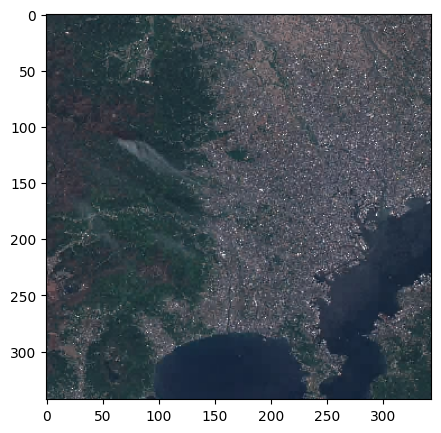

In [ ]:
thumbImg = Image.open(BytesIO(requests.get(thumbUrl[0]).content))
plt.figure(figsize=(5,5))
plt.imshow(thumbImg)

取得した全ての画像データの一覧をサムネイルで表示します。

In [ ]:
def getPreview(thumbList, r_num, c_num, figsize_x=12, figsize_y=12):
  """
  サムネイル画像を指定した引数に応じて行列状に表示
  r_num: 行数
  c_num: 列数
  """
  thumbs = thumbList
  f, ax_list = plt.subplots(r_num, c_num, figsize=(figsize_x,figsize_y))
  for row_num, ax_row in enumerate(ax_list):
    for col_num, ax in enumerate(ax_row):
      if len(thumbs) < r_num*c_num:
        len_shortage = r_num*c_num - len(thumbs) # 行列の不足分を算出
        count = row_num * c_num + col_num
        if count < len(thumbs):
          ax.label_outer() # サブプロットのタイトルと、軸のラベルが被らないようにします
          ax.imshow(io.imread(thumbs[row_num * c_num + col_num]))
          ax.set_title(thumbs[row_num * c_num + col_num][85:109])
        else:
          for i in range(len_shortage):
            blank = np.zeros([100,100,3],dtype=np.uint8)
            blank.fill(255)
            ax.label_outer()
            ax.imshow(blank)
      else:
        ax.label_outer()
        ax.imshow(io.imread(thumbs[row_num * c_num + col_num]))
        ax.set_title(thumbs[row_num * c_num + col_num][85:109])
  return plt.show()

In [ ]:
allthumbUrl = []
for item in items:
  allthumbUrl.append(item.assets['thumbnail'].href)

len(allthumbUrl)

8

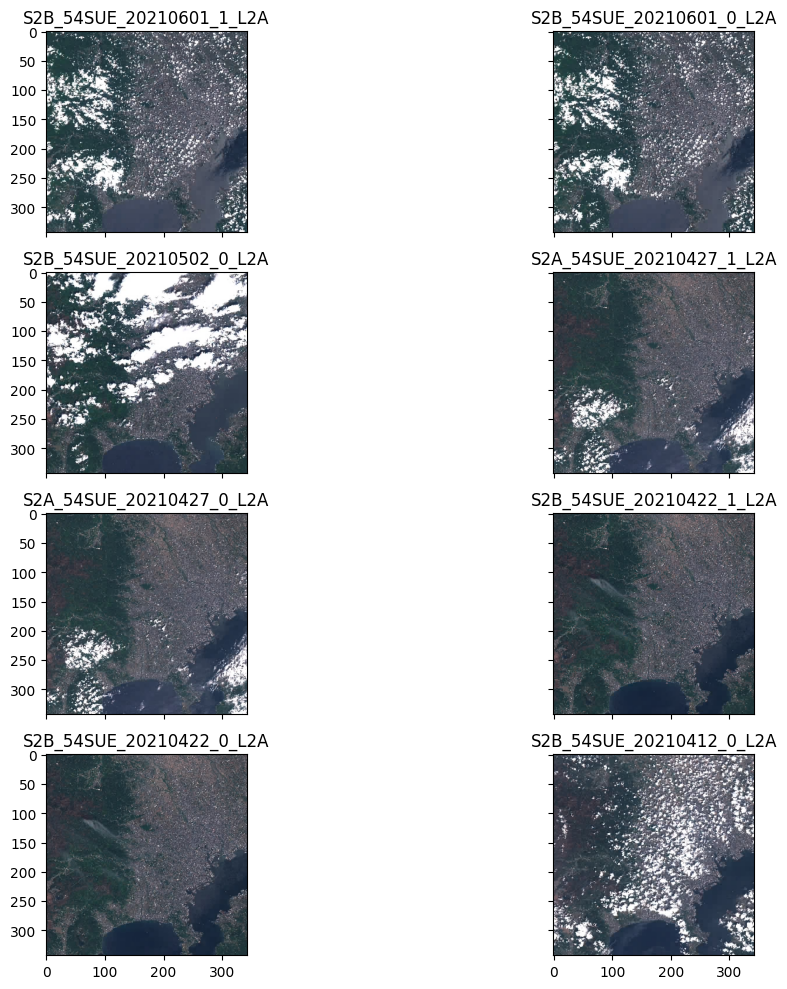

In [ ]:
getPreview(allthumbUrl,4,2)

サムネイルを通して雲量を確認することは可能ですが、多くの衛星画像を扱う場合に、一つ一つの画像をチェックするのでは、時間がかかりすぎます。そのため、衛星画像に雲などでマスク処理を行い、マスク以外の領域からデータを抽出するという前処理が、実際にデータを扱い際には重要となります。

https://www.satfarming.com/2022/01/07/sentinel-2-satellite-cloud-mask/

それではファイルのURLを取得しましょう。URLはメタデータ内に記載されています。

In [ ]:
# 引用：https://note.nkmk.me/python-download-web-images/
def download_file(url, dst_path):
   try:
       with urllib.request.urlopen(url) as web_file, open(dst_path, 'wb') as local_file:
           local_file.write(web_file.read())
   except urllib.error.URLError as e:
       print(e)

def download_file_to_dir(url, dst_dir):
   download_file(url, os.path.join(dst_dir, os.path.basename(url)))

In [ ]:
# 画像の作成フォルダを作成
os.makedirs('sentinel2COG',exist_ok=True)
RGB_dir = "/content/sentinel2COG"

# 取得するバンドの選択
bandLists = ['red','green','blue'] # b04, b03, b02

# 画像のURL取得
file_url = []
[file_url.append(selected_item[0][band].href) for band in bandLists if file_url.append(selected_item[0][band].href) is not None]

# 画像のダウンロード
[download_file_to_dir(link, RGB_dir) for link in file_url if download_file_to_dir(link, RGB_dir) is not None]

[]

In [ ]:
file_url

['https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B04.tif',
 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B03.tif',
 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/S/UE/2021/4/S2B_54SUE_20210422_0_L2A/B02.tif']

In [ ]:
# 参照：https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html
# bboxの値はそのままで利用できないため、以下のコードを用いて変換を行います

bbox = box(minLon, minLat, maxLon, maxLat)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326)) # WGS84座標系を指定
geo = geo.to_crs(crs='epsg:32654') # Sentinel-2の画像に合わせます

def getFeatures(gdf):
    """rasterioで読み取れる形のデータに変換するための関数です"""
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(geo)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[396762.7785510754, 3927067.932522922], [396990.4148314546, 3946767.1466804133], [382943.32116527937, 3946940.915480255], [382684.6295948352, 3927241.3322548624], [396762.7785510754, 3927067.932522922]]]}]


トゥルーカラー画像を作成します。

In [ ]:
# 画像の読み込み
b2 = rio.open(file_url[2])
b3 = rio.open(file_url[1])
b4 = rio.open(file_url[0])

# 出力ファイル名
RGB_path = os.path.join(RGB_dir,'sentinel-2_l2a-cogs'+'.tif')

# GeoTIFFの作成
RGB_color = rio.open(RGB_path,'w',driver='Gtiff', # driverにGtiff(GeoTIFF)
    width=b4.width, height=b4.height, # 画像の高さや幅を指定。B04のバンドと同じ大きさにしています
    count=3, # 3つのバンドを利用 (B02, B03, B04)
    crs=b4.crs, # crsもB04と同様。epsg:32654
    transform=b4.transform, # データに対する変換も同様のもの
    dtype=rio.uint16 # データ型を指定
    )
# 各々のバンド情報をRGB_colorに書き込み
RGB_color.write(b2.read(1),3) # 青
RGB_color.write(b3.read(1),2) # 緑
RGB_color.write(b4.read(1),1) # 赤
RGB_color.close()

with rio.open(RGB_path) as src:
  out_image, out_transform = mask(src, coords, crop=True) #mask処理の実行
  out_meta = src.meta # 作成する画像の情報はもともとの画像と同様のものにします

# メタ情報の更新
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# 画像の書き出し
with rio.open(RGB_path, "w", **out_meta) as dest:
  dest.write(out_image)

# 画像表示のため8bit形式で書き出し。画像の色味も調整します
scale = '-scale 0 255 0 25'
options_list = ['-ot Byte','-of Gtiff',scale]
options_string = " ".join(options_list)

gdal.Translate(os.path.join(RGB_dir,'sentinel-2_l2a-cogs_Masked'+'.tif'),os.path.join(RGB_dir,'sentinel-2_l2a-cogs'+'.tif'),options = options_string)

print("done")

done


画像と切り出す用のベクターファイル（ここではcoords）のCRSが合わないと、エラーが発生します。取得した画像のCRSを忘れにずにチェックするようにしましょう。`item.metadata['proj:epsg']`で確認することができます。

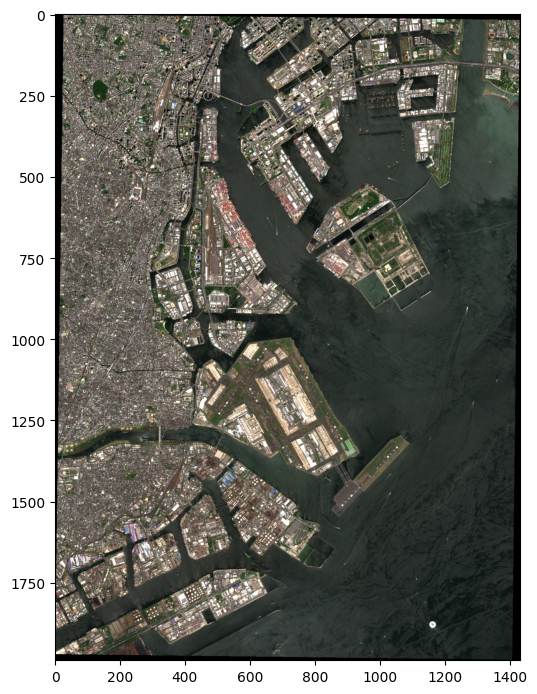

<Axes: >

In [ ]:
plt.figure(figsize=(6,10))
RGB_2017OctCOG = rio.open('/content/sentinel2COG/sentinel-2_l2a-cogs_Masked.tif')
show(RGB_2017OctCOG.read([1,2,3]))